Apply the Random Forests algorithm but this time only by upscaling the data. </p>

Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? </p> 

How would you change your algorithm or data in order to maximize the return of the bussiness?

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
numerical = pd.read_csv('./files_for_lab/numerical.csv')
categorical = pd.read_csv('./files_for_lab/categorical.csv')
targets = pd.read_csv('./files_for_lab/target.csv')
data = pd.concat([numerical, categorical, targets], axis = 1)
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [3]:
data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3

In [4]:
data.isna().sum().sum()

0

In [5]:
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)

numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numericalX)
scaled_numericalX = transformer.transform(numericalX)
scaled_numericalX = pd.DataFrame(scaled_numericalX, columns = numericalX.columns)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([scaled_numericalX, encoded_categorical], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.utils import resample

trainset = pd.concat([X_train, y_train], axis=1)
category_1 = trainset[trainset['TARGET_B']==1]
category_0 = trainset[trainset['TARGET_B']== 0]

category_1 = resample(category_1, 
                      replace=True, 
                      n_samples = len(category_0))

trainset_new = pd.concat([category_0, category_1], axis = 0)
trainset_new = trainset_new.sample(frac =1) 

print(category_0.shape)
print(category_1.shape)


X_train = trainset_new.drop(['TARGET_B'], axis=1)
y_train = trainset_new['TARGET_B']

print(X_train.shape)

(72486, 356)
(72486, 356)
(144972, 355)


In [7]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

X_train = X_train.drop(['TARGET_D'], axis = 1)
X_test = X_test.drop(['TARGET_D'], axis = 1)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_features=0.2,
                             random_state = 42)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6291007918770521
0.6155216685007598


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[11199,  6884],
       [  453,   547]], dtype=int64)

In [9]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix

# clf = RandomForestClassifier(max_depth=5,
#                              min_samples_split=7,
#                              min_samples_leaf =4,
#                              max_features= 2,
#                              random_state = 42)
# clf.fit(X_train, y_train)
# print(clf.score(X_train, y_train))
# print(clf.score(X_test, y_test))

# y_pred = clf.predict(X_test)
# display(y_test.value_counts())
# display(confusion_matrix(y_test, y_pred))


In [10]:
# from sklearn.model_selection import cross_val_score
# clf = RandomForestClassifier(max_depth=5,
#                              min_samples_split=20,
#                              min_samples_leaf =20)
# cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
# print(np.mean(cross_val_scores))

In [11]:
# cross_val_scores

In [12]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import cross_validate

# max_depth_choices= [5, 6, 7, 8, 9, 10, None]
# min_samples_split_choices = [10, 12, 14, 16, 18, 20]
# min_samples_leaf_choices = [10, 12, 14, 16, 18, 20]
# max_features_choices = [0.2, 0.3, 0.4, 0.5, 0.6]




# random_grid = {'max_depth': max_depth_choices,
#                'min_samples_split': min_samples_split_choices,
#                'min_samples_leaf': min_samples_leaf_choices,
#                'max_features': max_features_choices}

In [13]:
# from sklearn.model_selection import RandomizedSearchCV

# model = RandomForestClassifier()
# random_search = RandomizedSearchCV(estimator = model, 
#                                    param_distributions = random_grid, 
#                                    n_iter=25, cv = 5, n_jobs = 10)

In [14]:
# random_search.fit(X_train,y_train)

In [15]:
# random_search.best_params_

In [16]:
# random_search.best_score_

The cost of a false negative would be worse than a false positive, because the amount they would donate would be bigger than the cost of the mailing. That is why we would need to increrase the recall even if the precision and accuracy went down. We could try changing the parameters or downsampling to adjust our model so it would prioritize the positives instead of the negatives. 

In [19]:
X.drop('TARGET_D', axis = 1, inplace = True)

In [35]:
y = data['TARGET_D']
prediction_B = clf.predict(X)
prediction_B = pd.DataFrame(prediction_B, columns = ['pred'])
X_B = pd.concat([X, prediction_B, y], axis = 1)
new_data = X_B[X_B['pred'] == 1].reset_index(drop = True)
new_data.shape

(37466, 356)

In [38]:
new_y = new_data['TARGET_D']
new_X = new_data.drop(['TARGET_D'], axis = 1)

numericalX = new_X.select_dtypes(np.number)
categoricalX = new_X.select_dtypes(np.object)

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numericalX)
scaled_numericalX = transformer.transform(numericalX)
scaled_numericalX = pd.DataFrame(scaled_numericalX, columns = numericalX.columns)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
new_X = pd.concat([scaled_numericalX, encoded_categorical], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=0)

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix

clf = RandomForestRegressor()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)

0.8497448353152511
-0.030519587443385232


The model looks overfitted, since the y-train gets a grerat r-score but the test one doesn't. 

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix

clf = RandomForestRegressor(max_depth=10,
                            min_samples_split=2,
                            min_samples_leaf = 5,
                            max_features= 0.2,
                            random_state = 42)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)

0.19781063394949594
0.041089739379024715


In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy')

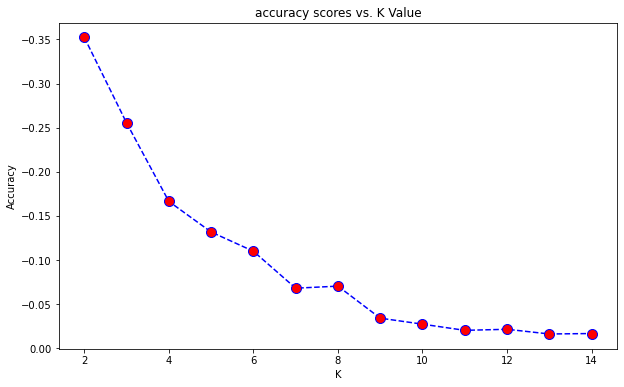

In [53]:
scores = []
for k in range(2,15):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))


plt.figure(figsize=(10,6))
plt.plot(range(2,15),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('Accuracy')

In [49]:
KNN = KNeighborsRegressor(n_neighbors=6)
KNN.fit(X_train, y_train)


score = KNN.score(X_test, y_test)
score

-0.1099282458174744

In [55]:
LR = LinearRegression().fit(X_train,y_train)

score = LR.score(X_test, y_test)
score

0.017026087119952682

Since the first model was already not very good and this one has way to many categories, our prediction scores for the donation are very very bad.